In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
# from flask import Flask,render_template
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<h1>data info

In [2]:
dataframe=pd.read_csv('train.csv')
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataframe=dataframe.drop(['PassengerId','Name'],axis=1)

In [4]:
dataframe.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [6]:
dataframe.shape

(891, 10)

In [7]:
dataframe.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

<h1>Missing values

In [8]:
dataframe.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# 687 missing of 891, so drop it
dataframe=dataframe.drop(['Cabin'],axis=1)

In [10]:
dataframe.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,NaN,0,0,330877,8.4583,Q
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C


In [11]:
#Age is numerical data (palance data so we replace nan values with mean)&
#Embarked is categorical (so we use mode)
dataframe['Age']=dataframe['Age'].fillna(dataframe['Age'].mean())
dataframe['Embarked']=dataframe['Embarked'].fillna(dataframe['Embarked'].mode()[0])


In [12]:
dataframe.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.000000,1,0,113803,53.1000,S
4,0,3,male,35.000000,0,0,373450,8.0500,S
5,0,3,male,29.699118,0,0,330877,8.4583,Q
6,0,1,male,54.000000,0,0,17463,51.8625,S
7,0,3,male,2.000000,3,1,349909,21.0750,S
8,1,3,female,27.000000,0,2,347742,11.1333,S
9,1,2,female,14.000000,1,0,237736,30.0708,C


In [13]:
dataframe.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

<b>unique values

In [14]:
for col in dataframe.columns:
    uniq=dataframe[col].unique().tolist()
    print(f'num of unique values of {col} colomn is:  {len(uniq)}')

num of unique values of Survived colomn is:  2
num of unique values of Pclass colomn is:  3
num of unique values of Sex colomn is:  2
num of unique values of Age colomn is:  89
num of unique values of SibSp colomn is:  7
num of unique values of Parch colomn is:  7
num of unique values of Ticket colomn is:  681
num of unique values of Fare colomn is:  248
num of unique values of Embarked colomn is:  3


In [15]:
# 681 is unuque in Ticket colomn ,so it won't be effective ,so drop it
dataframe=dataframe.drop(['Ticket'],axis=1)

<AxesSubplot:>

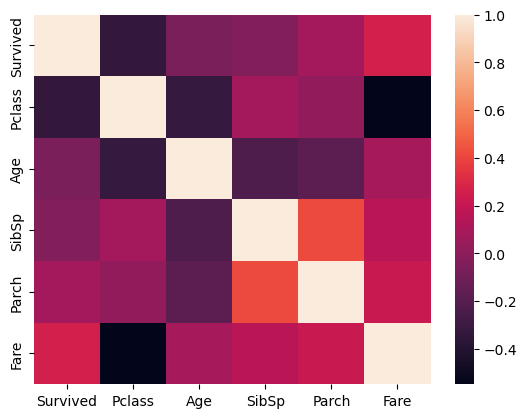

In [16]:
sns.heatmap(dataframe.corr())

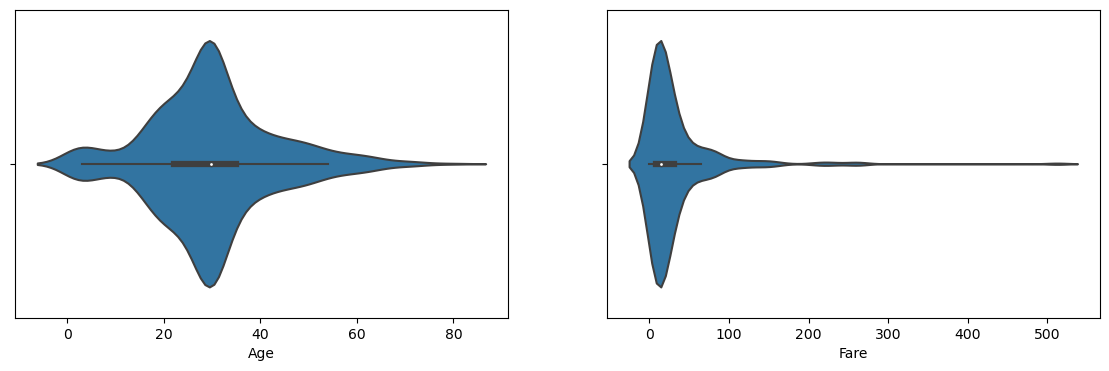

In [17]:
# dealing with continous colomns
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.violinplot(dataframe['Age'])
plt.subplot(1,2,2)
sns.violinplot(dataframe['Fare'])
plt.show()

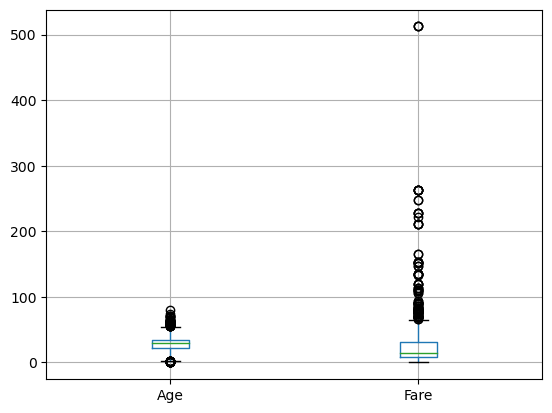

In [18]:
#check for outliers
dataframe[['Age','Fare']].boxplot()
plt.show()

 in case of 'Age', the outliers are aged/old persons. So we should not remove them.<br>
   ,so we divide 'Age' and 'Fare' coloumns into categories

In [19]:
age_cat = []
age = dataframe['Age']
for i in age:
    if i<13:
        age_cat.append('Children')
    elif i<20:
        age_cat.append('Teenagers')
    elif i<40:
        age_cat.append('Adults')
    elif i<60:
        age_cat.append('Middle Age')
    else:
        age_cat.append('Senior Citizen')
dataframe['Age Category'] = age_cat



fare_category = []
fare = dataframe['Fare']
for f in fare:
    if f<100:
        fare_category.append('Low')
    elif f<250:
        fare_category.append('Average')
    else:
        fare_category.append('High')
dataframe['Fare Category'] = fare_category

dataframe.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Category,Fare Category
0,0,3,male,22.000000,1,0,7.2500,S,Adults,Low
1,1,1,female,38.000000,1,0,71.2833,C,Adults,Low
2,1,3,female,26.000000,0,0,7.9250,S,Adults,Low
3,1,1,female,35.000000,1,0,53.1000,S,Adults,Low
4,0,3,male,35.000000,0,0,8.0500,S,Adults,Low
5,0,3,male,29.699118,0,0,8.4583,Q,Adults,Low
6,0,1,male,54.000000,0,0,51.8625,S,Middle Age,Low
7,0,3,male,2.000000,3,1,21.0750,S,Children,Low
8,1,3,female,27.000000,0,2,11.1333,S,Adults,Low
9,1,2,female,14.000000,1,0,30.0708,C,Teenagers,Low


In [20]:
# dealing with descrete colomns

#The column 'SibSp' means no. of Siblings/Spouse. The column 'Parch' means no. of Parent/Children.
#So we are adding these two columns as 'Family Members'.
dataframe['Family Members'] = dataframe['SibSp'] + dataframe['Parch']

In [21]:
#dealing with categorical data
# here dealing the discreet data also as categorical data just for EDA(Exploratory data analysis)
#to make insights with relationship between independent data and dependent data
categorical = ['Pclass', 'Sex', 'Embarked', 'Age Category',  'Fare Category', 'Family Members']

# changing data type
df = dataframe.copy()
for col in categorical:
    df[col]=df[col].astype(str)
    

<AxesSubplot:xlabel='Pclass', ylabel='count'>

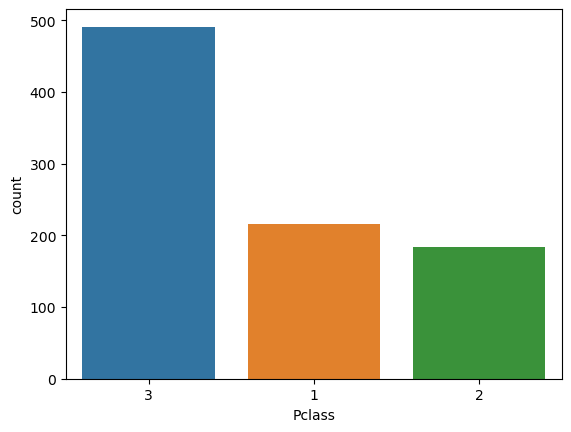

In [22]:
sns.countplot(df['Pclass'])

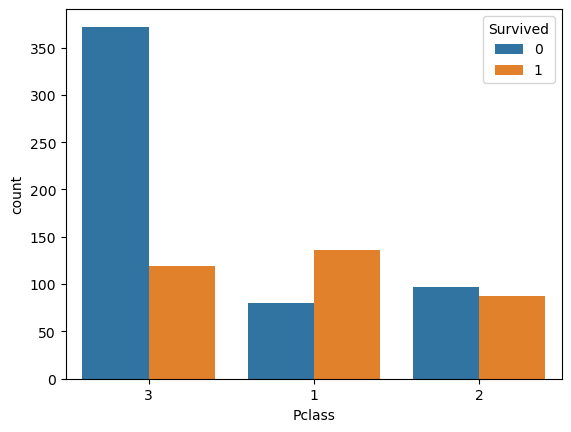

In [23]:
ax = sns.countplot(x="Pclass", hue="Survived", data=df)

Insights:<br>
1-Lower class has the highest number of passengers.<br>
2-For lower class death rate is much higher than survival rate, <br>
  for middle class both rates are almost same, <br>
  for higher class survival rate is higher than death rate.<br>
<br>
Higher class has the highest survival rate

<AxesSubplot:xlabel='Sex', ylabel='count'>

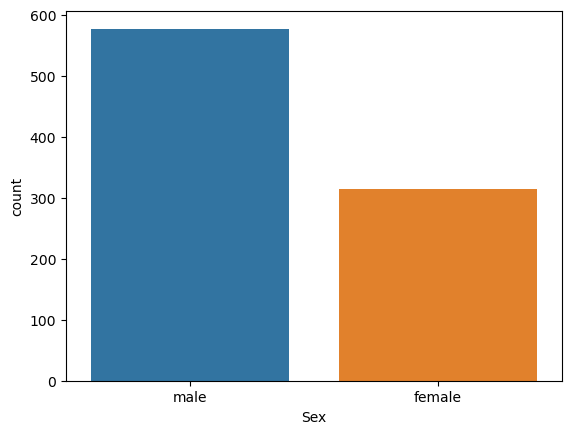

In [24]:
sns.countplot(df['Sex'])

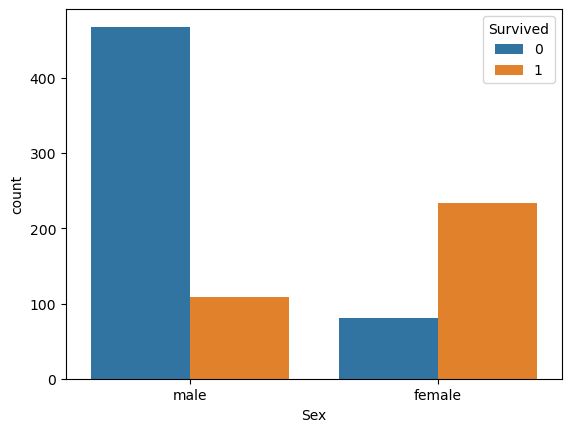

In [25]:
ax = sns.countplot(x="Sex", hue="Survived", data=df)

Insights:<br>
The total no. of male passengers is much higher than that of female.
But the survival rate in male passengers is much lower than that of female     

<AxesSubplot:xlabel='Family Members', ylabel='count'>

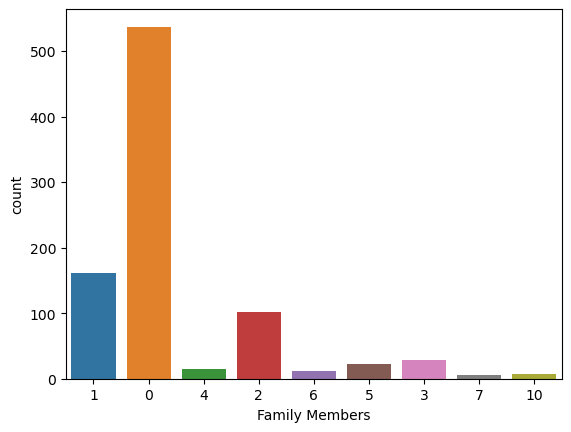

In [26]:
sns.countplot(df['Family Members'])

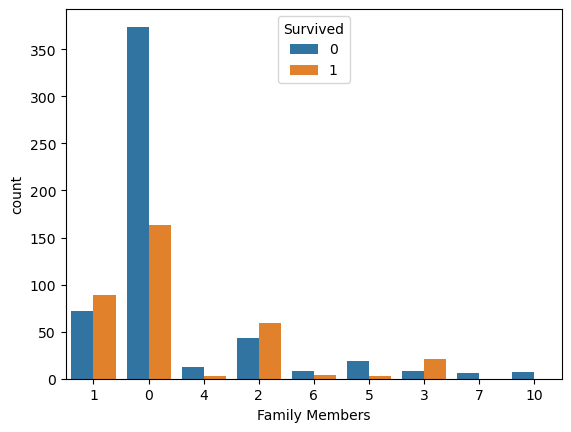

In [27]:
ax = sns.countplot(x="Family Members", hue="Survived", data=df)

Insights:<br>

1-Most of the passengers are travelling alone. No. of people with more than 2 family members are very less.<br>
2-But the people who are travelling alone has death rate significantly higher than their survival rate.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

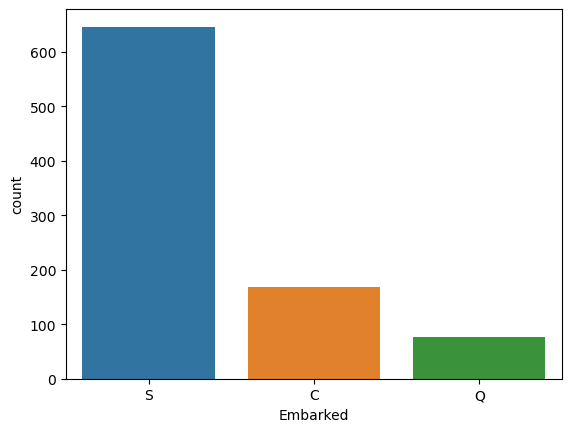

In [28]:
sns.countplot(df['Embarked'])

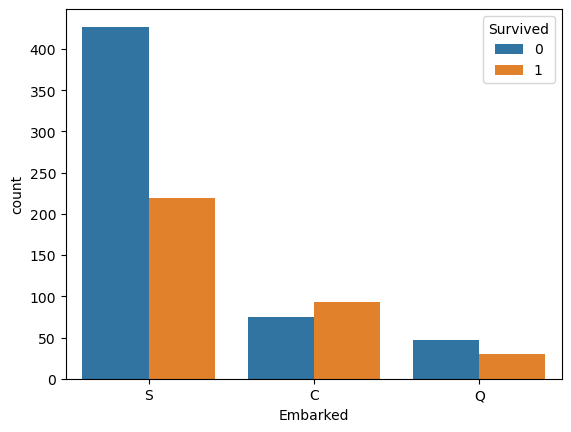

In [29]:
ax = sns.countplot(x="Embarked", hue="Survived", data=df)

Insights:<br>

1-Most of the people embarked from Southampton, very less people embarked from Queenstown.<br>
2-People embarked from 'Southampton' has the lowest survival rate and 
  people embarked from 'Cherbourg' has the highest survival rate.

<AxesSubplot:xlabel='Age Category', ylabel='count'>

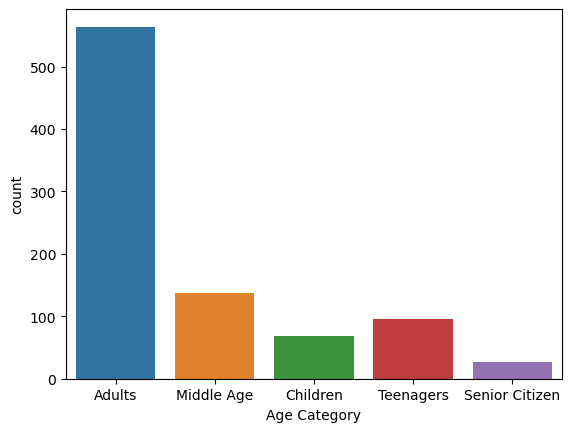

In [30]:
sns.countplot(df['Age Category'])

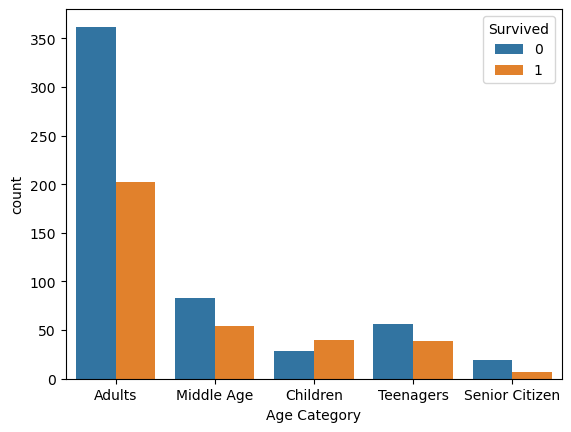

In [31]:
ax = sns.countplot(x="Age Category", hue="Survived", data=df)

Insights:<br>

1-Most of the passengers belong from the 20-40 age category(Adults).<br>
2-Children has the highest survival rate among all.<br>
3-For adults death rate is much higher than survive rate.

<AxesSubplot:xlabel='Fare Category', ylabel='count'>

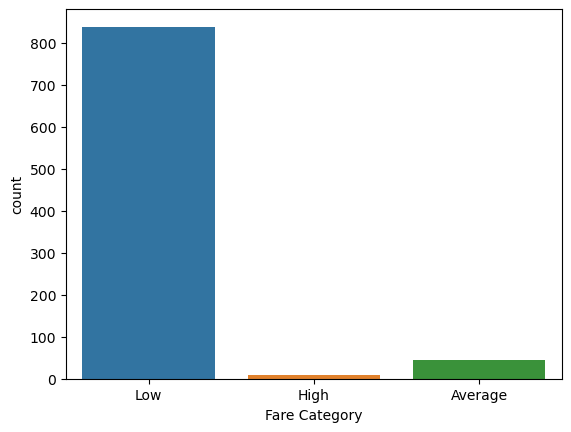

In [32]:
sns.countplot(df['Fare Category'])

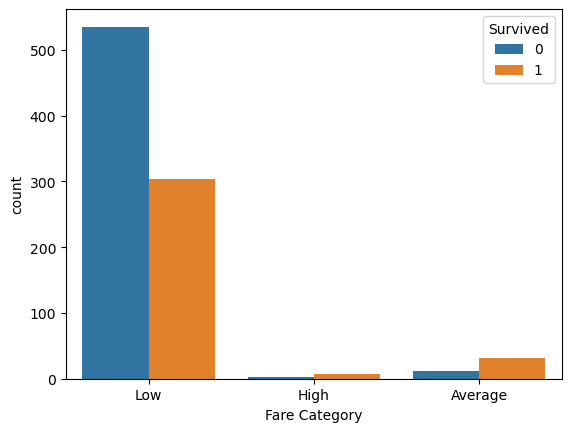

In [33]:
ax = sns.countplot(x="Fare Category", hue="Survived", data=df)

Insights:<br>

1-No. of people with low fare tickets are the highest (more than 800 among 891 records).<br>
2-Low fare tickets people has the lowest rate of survival. High and Average fare people has high rate of survival.

<AxesSubplot:xlabel='Survived', ylabel='count'>

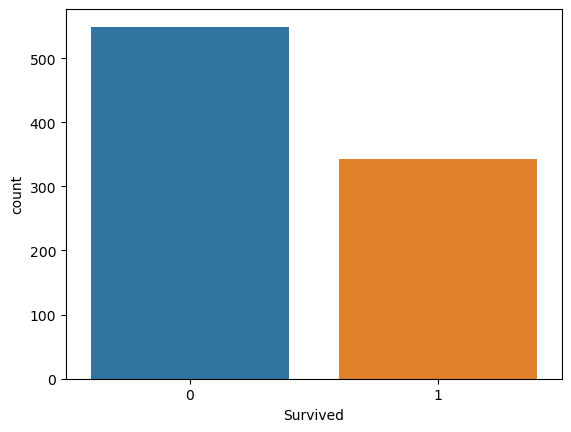

In [34]:
sns.countplot(df['Survived'])

No. of deceased people is higher than survived people.<br><br>
<b>Taking necessary columns and splitting the data:

In [35]:
columns = ['Pclass', 'Sex', 'Age', 'Embarked', 'Family Members', 'Fare Category']

x = dataframe[columns]
y = dataframe['Survived']

for col in ['Sex','Embarked', 'Fare Category']:  #rescaling data
    x[col]=LabelEncoder().fit_transform(x[col])
    
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

<br><b>Building different models.

In [36]:
LR = LogisticRegression().fit(x_train, y_train)
KNN = KNeighborsClassifier().fit(x_train, y_train)
DT = DecisionTreeClassifier().fit(x_train, y_train)
RF = RandomForestClassifier().fit(x_train, y_train)
NB = GaussianNB().fit(x_train, y_train)
GBR = GradientBoostingClassifier().fit(x_train, y_train)
XGB = XGBClassifier().fit(x_train, y_train)

mod = [LR,KNN,DT,RF,NB,GBR,XGB]

In [37]:
accuracy = [accuracy_score(y_test, model.predict(x_test)) for model in mod]
models = ['Logistic Regression','K Nearest Neighbour', 'Decision Tree', 'Random Forest',
         'Naive Bayes', 'Gradient Boosting', 'XgBoost']

acc = pd.DataFrame({'Models':models,'Accuracy':accuracy})
acc

,Models,Accuracy
0,Logistic Regression,0.810056
1,K Nearest Neighbour,0.782123
2,Decision Tree,0.798883
3,Random Forest,0.821229
4,Naive Bayes,0.782123
5,Gradient Boosting,0.826816
6,XgBoost,0.826816


<b>XgBoost and Gradient Boosting gave the highest accuracy.

In [38]:
confusion_matrix(y_test, XGB.predict(x_test))

array([[92, 13],
       [18, 56]], dtype=int64)

In [39]:
print(classification_report(y_test, XGB.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



<h4>Testing Data

In [40]:
test_data = pd.read_csv("test.csv")
test_data.shape

(418, 11)

In [41]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
#Checking for nulls in test data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
test = test_data.copy()

In [44]:
#'Cabin' column won't be present in out dataset so removing the nulls for 'Age' only
test['Age'] = pd.DataFrame(SimpleImputer().fit_transform(test[['Age']]))

In [45]:
test['Family Members'] = test['SibSp'] + test['Parch']

In [46]:
t = []
for i in range(418):
    if test['Fare'][i]<100:
        t.append('Low')
    elif test['Fare'][i]<250:
        t.append('Average')
    else:
        t.append('High')
test['Fare Category'] = t

In [47]:
# dropping extra columns
eliminate = [col for col in test.columns if col not in ['Pclass', 'Sex', 'Age', 'Embarked', 'Family Members', 'Fare Category']]
test = test.drop(eliminate, axis=1)

In [48]:
test.isnull().sum()

Pclass            0
Sex               0
Age               0
Embarked          0
Family Members    0
Fare Category     0
dtype: int64

In [53]:
test.head(2)

,Pclass,Sex,Age,Embarked,Family Members,Fare Category
0,3,1,34.5,1,0,2
1,3,0,47.0,2,1,2


In [50]:
for col in ['Sex','Embarked', 'Fare Category']:
    test[col]=LabelEncoder().fit_transform(test[col])
y_pred = XGB.predict(test)
submission = pd.DataFrame({'PassengerId':test_data.PassengerId,'Survived':y_pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [51]:
submission.to_csv('submission.csv', index=False)

<br><h1>deployment

In [52]:
model = XGBClassifier().fit(x_train, y_train)
pickle.dump(model, open("model.pkl", 'wb'))
model=pickle.load(open('model.pkl','rb'))
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))
result3= loaded_model.score(x_test, y_test)
print(result3)

0.8268156424581006
